## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Modelado

---

En esta libreta se comienzan a ejecutar las actividades correspondientes a la fase de modelado. 

---

### Carga de librerias a utilizar

In [306]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Lectura del dataset generado previamente

In [307]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../data/final/datos_finales.csv', sep=';')
datos.head()

,estado_civil,estado_credito,antiguedad_empleado,edad,pct_ingreso,ingresos,antiguedad_cliente,limite_credito_tc,gastos_ult_12m,operaciones_ult_12m,...,estado_cliente,genero,nivel_educativo,personas_a_cargo,completitud_fila,estado_civil_ok,estado_cliente_ok,genero_ok,nivel_educativo_ok,nivel_tarjeta_ok
0,C,C,5_a_10,menor_25,hasta_20,50k_a_100k,2y_a_4y,3k_a_5k,mayor_10k,mayor_100,...,ACTIVO,F,SECUNDARIO_COMPLETO,3.0,0.0,True,True,True,True,True
1,S,P,menor_10,menor_25,hasta_20,20k_a_50k,2y_a_4y,3k_a_5k,menor_1k,15_a_30,...,PASIVO,M,DESCONOCIDO,0.0,0.0,True,True,True,True,True
2,D,C,5_a_10,menor_25,20_a_40,20k_a_50k,2y_a_4y,5k_a_10k,1k_a_4k,15_a_30,...,PASIVO,M,POSGRADO_COMPLETO,3.0,0.0,True,True,True,True,True
3,S,C,menor_10,25_a_30,20_a_40,20k_a_50k,menor_2y,menor_3k,1k_a_4k,75_a_100,...,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0,0.0,True,True,True,True,True
4,C,C,menor_10,25_a_30,20_a_40,50k_a_100k,2y_a_4y,3k_a_5k,4k_a_6k,50_a_75,...,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0,0.0,True,True,True,True,True


### Revisión de meta-datos

In [308]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

print("Descripción del dataset 'datos_completos'")
reporte_descripcion_dataset(datos)

Descripción del dataset 'datos_completos'
Columnas del dataset:

estado_civil
estado_credito
antiguedad_empleado
edad
pct_ingreso
ingresos
antiguedad_cliente
limite_credito_tc
gastos_ult_12m
operaciones_ult_12m
importe_solicitado
duracion_credito
situacion_vivienda
objetivo_credito
falta_pago
estado_cliente
genero
nivel_educativo
personas_a_cargo
completitud_fila
estado_civil_ok
estado_cliente_ok
genero_ok
nivel_educativo_ok
nivel_tarjeta_ok

Cantidad de filas: 9765


### Armado de los sets de entrenamiento y testeo

In [309]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.falta_pago.values

features = datos[['operaciones_ult_12m', 'gastos_ult_12m', 'limite_credito_tc',
       'antiguedad_cliente', 'ingresos', 'pct_ingreso',
       'antiguedad_empleado', 'edad', 'importe_solicitado', 'duracion_credito',
       'situacion_vivienda', 'objetivo_credito', 'estado_credito',
       'estado_civil', 'estado_cliente', 'genero',
       'nivel_educativo', 'personas_a_cargo']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['N' 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,operaciones_ult_12m,gastos_ult_12m,limite_credito_tc,antiguedad_cliente,ingresos,pct_ingreso,antiguedad_empleado,edad,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_credito,estado_civil,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,mayor_100,mayor_10k,3k_a_5k,2y_a_4y,50k_a_100k,hasta_20,5_a_10,menor_25,11000,3,HIPOTECA,INVERSIONES,C,C,ACTIVO,F,SECUNDARIO_COMPLETO,3.0
1,15_a_30,menor_1k,3k_a_5k,2y_a_4y,20k_a_50k,hasta_20,menor_10,menor_25,1500,2,ALQUILER,MEJORAS_HOGAR,P,S,PASIVO,M,DESCONOCIDO,0.0
2,15_a_30,1k_a_4k,5k_a_10k,2y_a_4y,20k_a_50k,20_a_40,5_a_10,menor_25,10000,2,OTROS,EDUCACIÓN,C,D,PASIVO,M,POSGRADO_COMPLETO,3.0
3,75_a_100,1k_a_4k,menor_3k,menor_2y,20k_a_50k,20_a_40,menor_10,25_a_30,6000,4,ALQUILER,INVERSIONES,C,S,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,50_a_75,4k_a_6k,3k_a_5k,2y_a_4y,50k_a_100k,20_a_40,menor_10,25_a_30,10000,2,HIPOTECA,EDUCACIÓN,C,C,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0


In [310]:
# Se pasa a binarizar los atributos
data = pd.get_dummies(features)
data.head()

,importe_solicitado,duracion_credito,personas_a_cargo,operaciones_ult_12m_15_a_30,operaciones_ult_12m_30_a_50,operaciones_ult_12m_50_a_75,operaciones_ult_12m_75_a_100,operaciones_ult_12m_mayor_100,operaciones_ult_12m_menor_15,gastos_ult_12m_1k_a_4k,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,11000,3,3.0,False,False,False,False,True,False,False,...,True,False,True,False,False,False,False,True,False,False
1,1500,2,0.0,True,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
2,10000,2,3.0,True,False,False,False,False,False,True,...,False,True,False,True,False,True,False,False,False,False
3,6000,4,2.0,False,False,False,True,False,False,True,...,True,False,True,False,False,False,False,False,False,True
4,10000,2,2.0,False,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True


In [311]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito' 

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [312]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
importe_solicitado                          12000.0
duracion_credito                                3.0
personas_a_cargo                                4.0
operaciones_ult_12m_15_a_30                   False
operaciones_ult_12m_30_a_50                    True
                                             ...   
nivel_educativo_POSGRADO_COMPLETO             False
nivel_educativo_POSGRADO_INCOMPLETO           False
nivel_educativo_SECUNDARIO_COMPLETO            True
nivel_educativo_UNIVERSITARIO_COMPLETO        False
nivel_educativo_UNIVERSITARIO_INCOMPLETO      False
Name: 6443, Length: 61, dtype: object
--------------------------------------------------
Label del registro: 
N

##################################################
##################################################

Un registro de testeo: 
importe_solicitado                          7000.0
duracion_credito                               2.0
personas_a_cargo                               1.0
oper

In [313]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()

In [314]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

In [315]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier()
clf.fit(train_data, train_labels)

2023/12/06 20:40:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '377bb99205864689b1a00ae76cf4ae99', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DummyClassifier(constant=None, random_state=None, strategy='prior')

In [316]:
prediction = clf.predict(test_data)

print('Rendimiento obtenido:',accuracy_score(test_labels, prediction))
print('Vista de una muestra de valores de predicción y datos de testeo:')
print(prediction[:10])
print(test_labels[:10])

Rendimiento obtenido: 0.819000819000819
Vista de una muestra de valores de predicción y datos de testeo:
['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N']
['N' 'N' 'Y' 'N' 'N' 'N' 'N' 'Y' 'N' 'N']


----
Se pasa a configurar la serie de experimentos en **mlflow**

In [317]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Prueba #1")
mlflow.autolog()

Traceback (most recent call last):
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 303, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 396, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1304, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1297, in _read_helper
    result = read_yaml(root, file_name)


#### Regresión Logística

In [318]:
from sklearn.linear_model import LogisticRegression

with mlflow.start_run(run_name='Logistic Regression'):
    lreg = LogisticRegression(solver = 'liblinear', random_state=0)

    lreg.fit(train_data, train_labels)

Rendimiento obtenido: 0.8632268632268633
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.93      0.92      2000
           Y       0.64      0.56      0.60       442

    accuracy                           0.86      2442
   macro avg       0.77      0.75      0.76      2442
weighted avg       0.86      0.86      0.86      2442

Matriz de confusión:


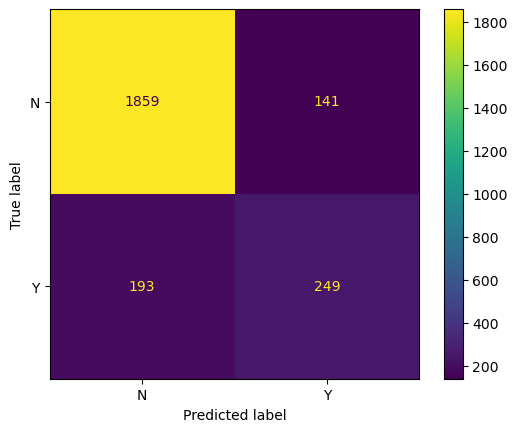

In [319]:
evaluar_modelo(lreg, test_data, test_labels)

#### KNN

In [320]:
from sklearn.neighbors import KNeighborsClassifier

with mlflow.start_run(run_name='KNN'):
    knn = KNeighborsClassifier(n_neighbors=50, 
                               algorithm = 'ball_tree', 
                               leaf_size = 25)

    knn.fit(train_data, train_labels)

Rendimiento obtenido: 0.8181818181818182
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.82      1.00      0.90      2000
           Y       0.42      0.01      0.02       442

    accuracy                           0.82      2442
   macro avg       0.62      0.50      0.46      2442
weighted avg       0.75      0.82      0.74      2442

Matriz de confusión:


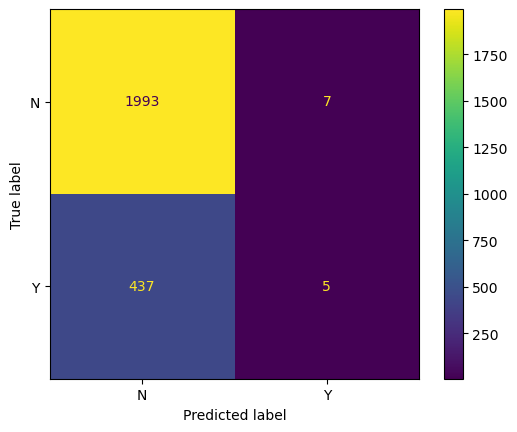

In [321]:
evaluar_modelo(knn, test_data, test_labels)

#### Árboles de Decisión (TDIDT)

In [322]:
from sklearn.tree import DecisionTreeClassifier

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10, 
                                 random_state=0)

    dtc.fit(train_data, train_labels)

Rendimiento obtenido: 0.8660933660933661
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.92      0.92      2000
           Y       0.64      0.61      0.62       442

    accuracy                           0.87      2442
   macro avg       0.78      0.76      0.77      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


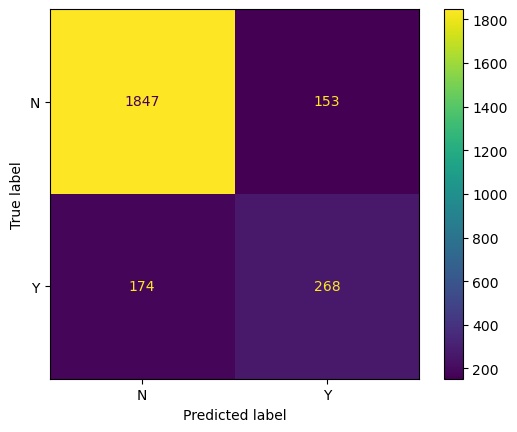

In [323]:
evaluar_modelo(dtc, test_data, test_labels)

#### Métodos de ensamblado de modelos: RandomForest

In [324]:
from sklearn.ensemble import RandomForestClassifier

with mlflow.start_run(run_name='Random Forest'):
    rndf = RandomForestClassifier(n_estimators=10, random_state=0)  # default_criterion='gini'
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.85995085995086
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.95      0.92      2000
           Y       0.66      0.46      0.55       442

    accuracy                           0.86      2442
   macro avg       0.78      0.71      0.73      2442
weighted avg       0.85      0.86      0.85      2442

Matriz de confusión:


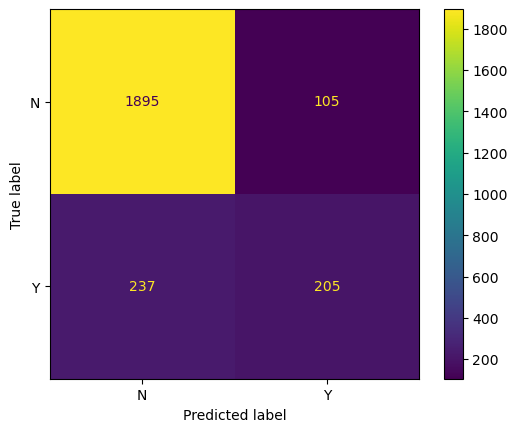

In [325]:
evaluar_modelo(rndf, test_data, test_labels)

#### Métodos de refuerzo de gradiente: GradientBoosting

In [326]:
from sklearn.ensemble import GradientBoostingClassifier

with mlflow.start_run(run_name='Gradient Boosting'):
    gb = GradientBoostingClassifier(n_estimators=10, random_state=0)  # default_criterion='friedman_mse'
    gb.fit(train_data, train_labels)

Rendimiento obtenido: 0.8574938574938575
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.86      0.99      0.92      2000
           Y       0.81      0.28      0.41       442

    accuracy                           0.86      2442
   macro avg       0.83      0.63      0.67      2442
weighted avg       0.85      0.86      0.83      2442

Matriz de confusión:


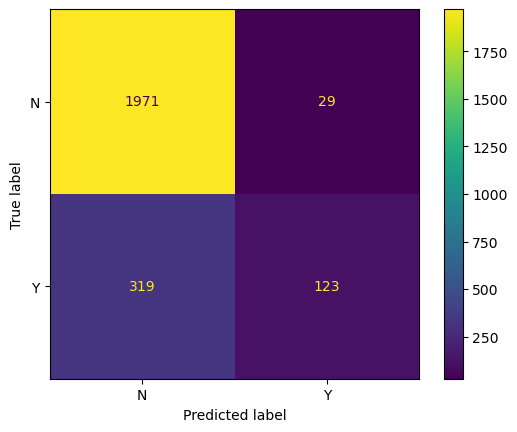

In [327]:
evaluar_modelo(gb, test_data, test_labels)

----
Prueba #2

In [328]:
mlflow.set_experiment(experiment_name="Prueba #2")


Traceback (most recent call last):
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 303, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 396, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1304, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1297, in _read_helper
    result = read_yaml(root, file_name)


<Experiment: artifact_location='file:///c:/Users/Antonio/13MBID/notebooks/03%20Modelado%2BEvaluaci%C3%B3n/mlruns/326040491881259975', creation_time=1701885621584, experiment_id='326040491881259975', last_update_time=1701885621584, lifecycle_stage='active', name='Prueba #2', tags={}>

In [329]:
with mlflow.start_run(run_name='Decision Tree (#2)'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='entropy', 
                                 min_samples_split=15, 
                                 random_state=0)

    dtc.fit(train_data, train_labels)

Salida de resultado de la evaluación correspondientes a la Prueba #2
Rendimiento obtenido: 0.8742833742833743
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.89      0.96      0.93      2000
           Y       0.74      0.47      0.58       442

    accuracy                           0.87      2442
   macro avg       0.82      0.72      0.75      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


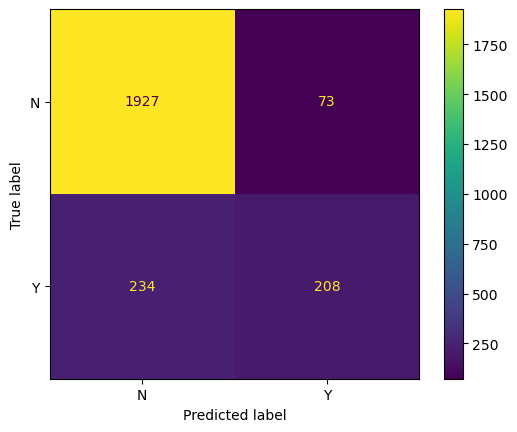

In [330]:
print("Salida de resultado de la evaluación correspondientes a la Prueba #2")
evaluar_modelo(dtc, test_data, test_labels)

In [331]:
with mlflow.start_run(run_name='Random Forest (#2)'):
    rndf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8677313677313677
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.95      0.92      2000
           Y       0.68      0.51      0.58       442

    accuracy                           0.87      2442
   macro avg       0.79      0.73      0.75      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


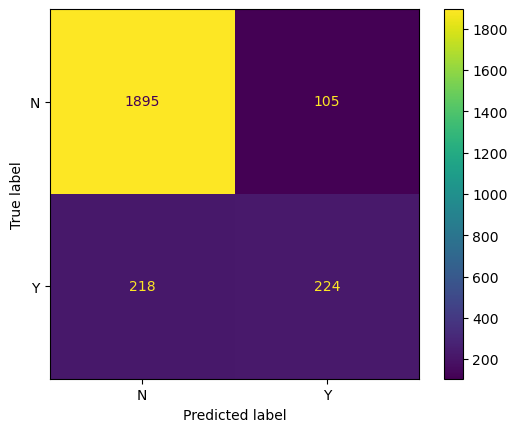

In [332]:
evaluar_modelo(rndf, test_data, test_labels)

In [333]:
with mlflow.start_run(run_name='Gradient Boosting (#2)'):
    gb = GradientBoostingClassifier(n_estimators=50, criterion='squared_error', random_state=0)
    gb.fit(train_data, train_labels)

Rendimiento obtenido: 0.871007371007371
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.94      0.92      2000
           Y       0.66      0.58      0.62       442

    accuracy                           0.87      2442
   macro avg       0.79      0.76      0.77      2442
weighted avg       0.87      0.87      0.87      2442

Matriz de confusión:


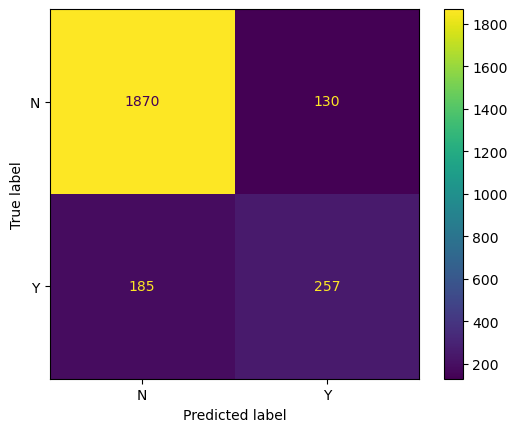

In [334]:
evaluar_modelo(gb, test_data, test_labels)

----
Prueba #3

In [335]:
mlflow.set_experiment(experiment_name="Prueba #3")

Traceback (most recent call last):
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 303, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 396, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1304, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1297, in _read_helper
    result = read_yaml(root, file_name)


<Experiment: artifact_location='file:///c:/Users/Antonio/13MBID/notebooks/03%20Modelado%2BEvaluaci%C3%B3n/mlruns/805830569230526417', creation_time=1701885639565, experiment_id='805830569230526417', last_update_time=1701885639565, lifecycle_stage='active', name='Prueba #3', tags={}>

In [336]:
with mlflow.start_run(run_name='Random Forest (#3)'):
    rndf = RandomForestClassifier(n_estimators=150, criterion='log_loss', random_state=0)
    rndf.fit(train_data, train_labels)

Rendimiento obtenido: 0.8677313677313677
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.90      0.95      0.92      2000
           Y       0.68      0.51      0.58       442

    accuracy                           0.87      2442
   macro avg       0.79      0.73      0.75      2442
weighted avg       0.86      0.87      0.86      2442

Matriz de confusión:


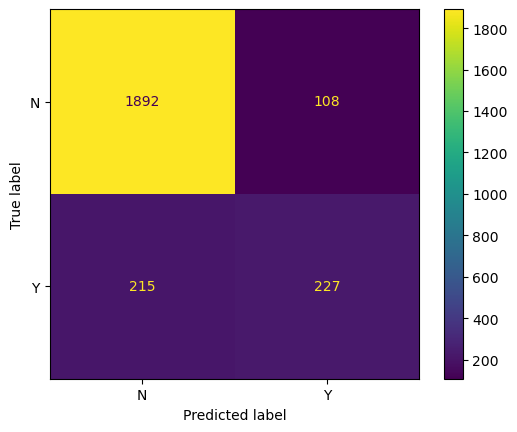

In [337]:
evaluar_modelo(rndf, test_data, test_labels)

In [363]:
with mlflow.start_run(run_name='Gradient Boosting (#3)'):
    gb = GradientBoostingClassifier(n_estimators=40, criterion='squared_error', random_state=0)
    gb.fit(train_data, train_labels)

Rendimiento obtenido: 0.8714168714168714
Reporte de indicadores:
               precision    recall  f1-score   support

           N       0.91      0.94      0.92      2000
           Y       0.67      0.58      0.62       442

    accuracy                           0.87      2442
   macro avg       0.79      0.76      0.77      2442
weighted avg       0.87      0.87      0.87      2442

Matriz de confusión:


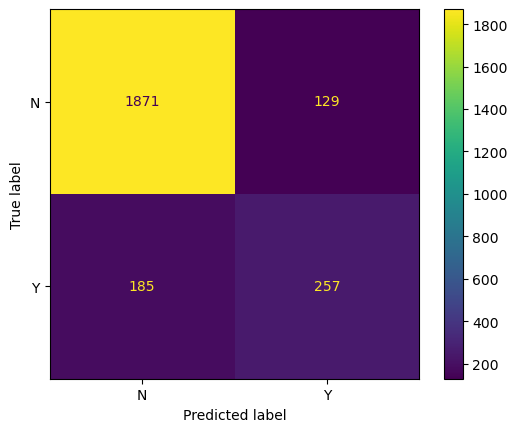

In [364]:
evaluar_modelo(gb, test_data, test_labels)

----

### Prueba de despliegue (utilizando datos nuevos)

In [340]:
datos_nuevos = pd.read_csv('../../data/final/datos_nuevos.csv', sep=';')
datos_nuevos.head(5)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,708510993,22,4000,4,3.0,HIPOTECA,62000,PERSONAL,0.06,6.76,...,47,SOLTERO,ACTIVO,15478.0,F,4905.0,UNIVERSITARIO_INCOMPLETO,Blue,109.0,1.0
1,708512051,25,10000,2,3.0,ALQUILER,120000,INVERSIONES,0.08,9.32,...,18,CASADO,ACTIVO,3950.0,M,1663.0,UNIVERSITARIO_COMPLETO,Blue,82.0,3.0
2,708513258,23,1700,2,2.0,HIPOTECA,45000,SALUD,0.04,14.72,...,29,CASADO,ACTIVO,3078.0,M,4323.0,UNIVERSITARIO_INCOMPLETO,Blue,58.0,1.0
3,708514512,25,7200,4,0.0,ALQUILER,71604,PAGO_DEUDAS,0.10,10.95,...,29,CASADO,ACTIVO,4314.0,F,3809.0,UNIVERSITARIO_INCOMPLETO,Blue,81.0,2.0
4,708515472,26,5000,3,5.0,HIPOTECA,52000,PAGO_DEUDAS,0.10,10.59,...,36,CASADO,ACTIVO,4216.0,F,4712.0,SECUNDARIO_COMPLETO,Blue,82.0,1.0


Se aplican las mismas transformaciones realizadas sobre los datos de entrenamiento, para que ambos datasets sean compatibles

In [341]:
# Columna: estado_civil
cambios_estado_civil = {
    'CASADO' : 'C',
    'SOLTERO' : 'S',
    'DESCONOCIDO' : 'N',
    'DIVORCIADO' : 'D',
}
estado_civil_N = datos_nuevos.loc[:, ('estado_civil')].map(cambios_estado_civil).rename('estado_civil')

# Columna: estado_credito
cambios_estado_credito = {
    0 : 'C', # Cancelado
    1 : 'P'  # Pendiente cancelación
}
estado_credito_N = datos_nuevos.loc[:, ('estado_credito')].map(cambios_estado_credito).rename('estado_credito')

# antigüedad del empleado
etiquetas_a_e = ['menor_10', '5_a_10', 'mayor_10']
rangos_a_e = [0, 4, 10, 50]
valor_para_nan = 'NA'
antiguedad_empleado_N = pd.cut(datos_nuevos['antiguedad_empleado'], 
                                bins=rangos_a_e, 
                                labels=etiquetas_a_e,
                                right=False).cat.add_categories(valor_para_nan).fillna(valor_para_nan)

# edad
etiquetas_e = ['menor_25', '25_a_30']
rangos_e = [0, 24, 50]
edad_N = pd.cut(datos_nuevos['edad'], 
                                bins=rangos_e, 
                                labels=etiquetas_e)

# pct ingreso
etiquetas_p_i = ['hasta_20', '20_a_40', '40_a_60', 'mayor_60']
rangos_p_i = [0, 0.19, 0.39, 0.60, 0.99]
pct_ingreso_N = pd.cut(datos_nuevos['pct_ingreso'], 
                                bins=rangos_p_i, 
                                labels=etiquetas_p_i)

# ingresos
etiquetas_i = ['hasta_20k', '20k_a_50k', '50k_a_100k', 'mayor_100k']
rangos_i = [0, 19999, 49999, 99999, 999999]
ingresos_N = pd.cut(datos_nuevos['ingresos'], 
                                bins=rangos_i, 
                                labels=etiquetas_i)

# antigüedad del cliente
etiquetas_a_c = ['menor_2y', '2y_a_4y', 'mayor_4y']
rangos_a_c = [0, 24, 48, 100]
antiguedad_cliente_N = pd.cut(datos_nuevos['antiguedad_cliente'], 
                                bins=rangos_a_c, 
                                labels=etiquetas_a_c)

# límite crédito tc
etiquetas_l_tc = ['menor_3k', '3k_a_5k', '5k_a_10k', 'mayor_10k']
rangos_l_tc = [0, 2999, 4999, 9999, 100000]
limite_credito_tc_N = pd.cut(datos_nuevos['limite_credito_tc'], 
                                bins=rangos_l_tc, 
                                labels=etiquetas_l_tc)

# gastos últimos 12 meses
etiquetas_g_u12 = ['menor_1k', '1k_a_4k', '4k_a_6k', '6k_a_8k', '8k_a_10k', 'mayor_10k']
rangos_g_u12 = [0, 999, 3999, 5999, 7999, 9999, 100000]
gastos_ult_12m_N = pd.cut(datos_nuevos['gastos_ult_12m'], 
                                bins=rangos_g_u12, 
                                labels=etiquetas_g_u12)

# operaciones últimos 12 meses
etiquetas_o_u12 = ['menor_15', '15_a_30', '30_a_50', '50_a_75', '75_a_100', 'mayor_100']
rangos_o_u12 = [0, 14, 29, 49, 74, 99, 1000]
operaciones_ult_12m_N = pd.cut(datos_nuevos['operaciones_ult_12m'], 
                                bins=rangos_o_u12, 
                                labels=etiquetas_o_u12)


col_eliminar_final = [
              'estado_civil',
              'estado_credito',
              'antiguedad_empleado',
              'edad',
              'pct_ingreso', 
              'ingresos',
              'antiguedad_cliente', 
              'limite_credito_tc', 
              'gastos_ult_12m', 
              'operaciones_ult_12m',
#              'regla_pct_ingresos',
#              'regla_duracion_credito',
              'id_cliente']

datos_nuevos.drop(col_eliminar_final, inplace=True, axis=1)

df_nuevo = pd.concat([estado_civil_N, estado_credito_N, antiguedad_empleado_N, edad_N, pct_ingreso_N, ingresos_N, antiguedad_cliente_N, limite_credito_tc_N, gastos_ult_12m_N, operaciones_ult_12m_N, datos_nuevos], axis=1)

# Se eliminan las mismas columnas que en los datos de entrenamiento
df_nuevo.drop(["tasa_interes", "nivel_tarjeta"], inplace=True, axis=1)

df_nuevo.head(5)

,estado_civil,estado_credito,antiguedad_empleado,edad,pct_ingreso,ingresos,antiguedad_cliente,limite_credito_tc,gastos_ult_12m,operaciones_ult_12m,importe_solicitado,duracion_credito,situacion_vivienda,objetivo_credito,estado_cliente,genero,nivel_educativo,personas_a_cargo
0,S,C,menor_10,menor_25,hasta_20,50k_a_100k,2y_a_4y,3k_a_5k,mayor_10k,mayor_100,4000,4,HIPOTECA,PERSONAL,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,1.0
1,C,C,menor_10,25_a_30,hasta_20,mayor_100k,menor_2y,menor_3k,1k_a_4k,75_a_100,10000,2,ALQUILER,INVERSIONES,ACTIVO,M,UNIVERSITARIO_COMPLETO,3.0
2,C,C,menor_10,menor_25,hasta_20,20k_a_50k,2y_a_4y,3k_a_5k,1k_a_4k,50_a_75,1700,2,HIPOTECA,SALUD,ACTIVO,M,UNIVERSITARIO_INCOMPLETO,1.0
3,C,C,menor_10,25_a_30,hasta_20,50k_a_100k,2y_a_4y,3k_a_5k,4k_a_6k,75_a_100,7200,4,ALQUILER,PAGO_DEUDAS,ACTIVO,F,UNIVERSITARIO_INCOMPLETO,2.0
4,C,C,5_a_10,25_a_30,hasta_20,50k_a_100k,2y_a_4y,3k_a_5k,4k_a_6k,75_a_100,5000,3,HIPOTECA,PAGO_DEUDAS,ACTIVO,F,SECUNDARIO_COMPLETO,1.0


In [342]:
nuevos_codif = pd.get_dummies(df_nuevo)
nuevos_codif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   importe_solicitado                        112 non-null    int64  
 1   duracion_credito                          112 non-null    int64  
 2   personas_a_cargo                          112 non-null    float64
 3   estado_civil_C                            112 non-null    bool   
 4   estado_civil_D                            112 non-null    bool   
 5   estado_civil_N                            112 non-null    bool   
 6   estado_civil_S                            112 non-null    bool   
 7   estado_credito_C                          112 non-null    bool   
 8   estado_credito_P                          112 non-null    bool   
 9   antiguedad_empleado_menor_10              112 non-null    bool   
 10  antiguedad_empleado_5_a_10            

In [343]:
# Dado que puede haber diferencias con el set de entrenamiento se emparejan

columnas_faltantes = set(data.columns) - set(nuevos_codif.columns)
print('Columnas faltantes: ', columnas_faltantes, '\n')
for columna in columnas_faltantes:
    nuevos_codif[columna] = 0  # Se agregan las columnas faltantes con valor 0

print('Datos nuevos: ' + str(len(nuevos_codif.columns)))
print('Datos entrenamiento: ' + str(len(data.columns)))
print(set(data.columns) - set(nuevos_codif.columns))

Columnas faltantes:  {'situacion_vivienda_OTROS'} 

Datos nuevos: 62
Datos entrenamiento: 61
set()


In [344]:
nuevos_codif = nuevos_codif[data.columns]
nuevos_codif.columns

Index(['importe_solicitado', 'duracion_credito', 'personas_a_cargo',
       'operaciones_ult_12m_15_a_30', 'operaciones_ult_12m_30_a_50',
       'operaciones_ult_12m_50_a_75', 'operaciones_ult_12m_75_a_100',
       'operaciones_ult_12m_mayor_100', 'operaciones_ult_12m_menor_15',
       'gastos_ult_12m_1k_a_4k', 'gastos_ult_12m_4k_a_6k',
       'gastos_ult_12m_6k_a_8k', 'gastos_ult_12m_8k_a_10k',
       'gastos_ult_12m_mayor_10k', 'gastos_ult_12m_menor_1k',
       'limite_credito_tc_3k_a_5k', 'limite_credito_tc_5k_a_10k',
       'limite_credito_tc_mayor_10k', 'limite_credito_tc_menor_3k',
       'antiguedad_cliente_2y_a_4y', 'antiguedad_cliente_mayor_4y',
       'antiguedad_cliente_menor_2y', 'ingresos_20k_a_50k',
       'ingresos_50k_a_100k', 'ingresos_hasta_20k', 'ingresos_mayor_100k',
       'pct_ingreso_20_a_40', 'pct_ingreso_40_a_60', 'pct_ingreso_hasta_20',
       'pct_ingreso_mayor_60', 'antiguedad_empleado_5_a_10',
       'antiguedad_empleado_mayor_10', 'antiguedad_empleado_meno

In [345]:
# Se hace la predicción con los nuevos datos, con el modelo Gradient Boosting (#3)

prediccion_nuevos = gb.predict(nuevos_codif)

prediccionDF = pd.DataFrame(prediccion_nuevos)

2023/12/06 20:41:37 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Antonio\miniconda3\envs\MBID13\Lib\site-packages\mlflow\data\pandas_dataset.py:116: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


In [346]:
# Se agrega la nueva columna
datos_nuevos['prediccion_mora'] = prediccionDF
datos_nuevos['prediccion_mora'].value_counts()

prediccion_mora
N    83
Y    29
Name: count, dtype: int64